In [1]:
import nibabel as nib
import os
import pickle as pkl
import glob
import re
import pandas as pd
from plotly.offline import (download_plotlyjs,
                            init_notebook_mode)
init_notebook_mode()

# Setting up the Disk Data Set descriptor .csv
BASE = "../../../data"
DATASET = "fmri"
root = os.path.join(BASE, DATASET)
regex = "^%s/(?P<subject>[a-zA-Z0-9.-]*)/(?P<task>[a-zA-Z0-9_-]*).pkl$"%(root)
subjects = []
tasks = []
filenames = []
dimcolumns = []
for filename in glob.iglob(root + "/**/*.pkl", recursive=True):
    subject = re.search(regex, filename).group('subject')
    task = re.search(regex, filename).group('task')
    #img = nib.load(filename)
    #data = img.get_data()
    #fname = "%s/%s.pkl"%(subject, task)
    #with open(os.path.join(root, fname), "wb") as f:
    #    pkl.dump(data, f)
    filenames.append(filename)
    subjects.append(subject)
    tasks.append(task)
    dimcolumns.append(True)
d = {
    'resource_path': filenames,
    'dim_column': dimcolumns,
    'subject': subjects,
    'task': tasks,
}
D = pd.DataFrame(d)
df_path = "%s/%s_meta.csv" % (root, DATASET)
D.to_csv(df_path)

# Load the lemur library
import sys
sys.path.append("../../..")
import lemur.datasets as lds
import lemur.metrics as lms
import lemur.plotters as lpl
import lemur.embedders as leb

# Create a lemur dataset based on the EEG data
DDS = lds.DiskDataSet(df_path)

# Create a lemur distance matrix based on the EEG data
DM = lds.DistanceMatrix(DDS, lms.DiffAve)

In [2]:
lpl.DistanceMatrixHeatmap(DM, mode="notebook",
                          primary_label="subject").plot()

In [3]:
lpl.DistanceMatrixEigenvectorHeatmap(DM, mode="notebook").plot()

In [4]:
lpl.DistanceMatrixScreePlotter(DM, mode="notebook").plot()

In [5]:
lpl.DendrogramPlotter(DM, primary_label="subject", mode="notebook").plot()
lpl.DendrogramPlotter(DM, primary_label="task", mode="notebook").plot()

In [6]:
MDSEmbedder = leb.MDSEmbedder(num_components=3)

In [7]:
lpl.EmbeddingParallelCoordinatePlotter(DM,
                                       primary_label="subject",
                                       mode="notebook").plot(MDSEmbedder)
lpl.EmbeddingParallelCoordinatePlotter(DM,
                                       primary_label="task",
                                       mode="notebook").plot(MDSEmbedder)

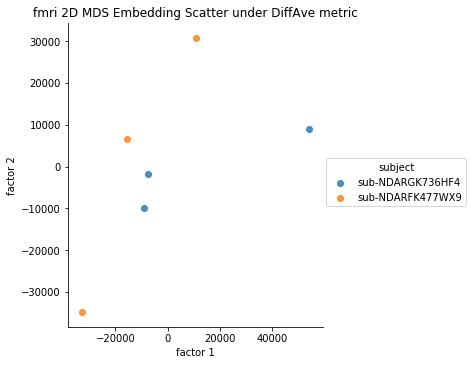

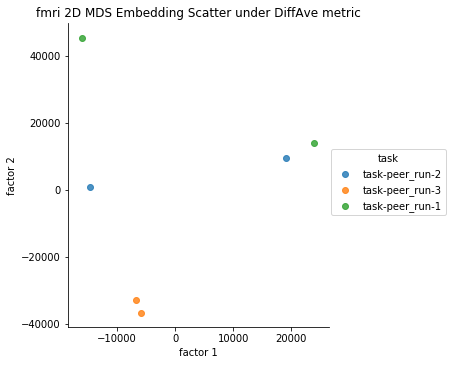

In [8]:
lpl.Embedding2DScatter(DM,
                       primary_label="subject",
                       mode="notebook").plot(MDSEmbedder)
lpl.Embedding2DScatter(DM,
                       primary_label="task",
                       mode="notebook").plot(MDSEmbedder)

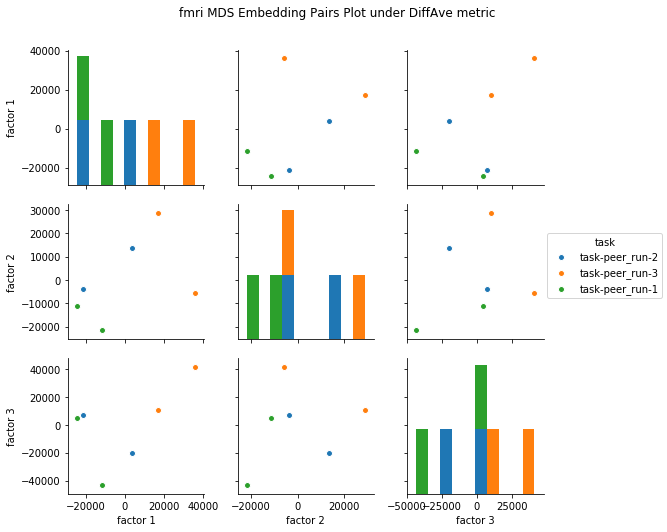

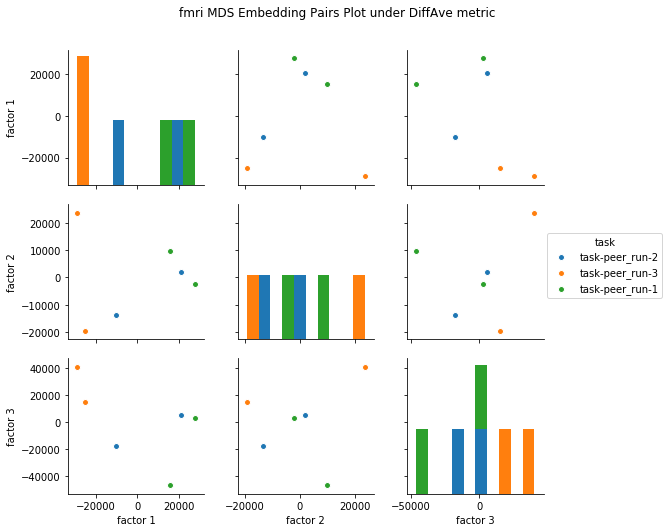

In [9]:
lpl.EmbeddingPairsPlotter(DM,
                          primary_label="task",
                          mode="notebook").plot(MDSEmbedder)
lpl.EmbeddingPairsPlotter(DM,
                          primary_label="task",
                          mode="notebook").plot(MDSEmbedder)

In [10]:
TSNEEmbedder = leb.TSNEEmbedder(num_components=3)

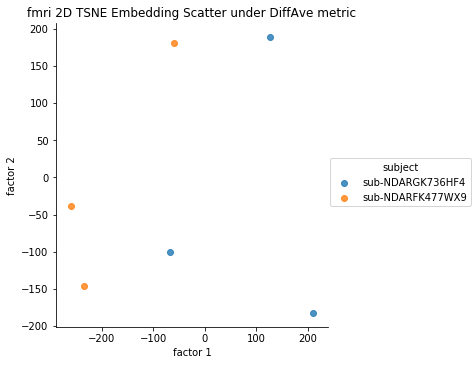

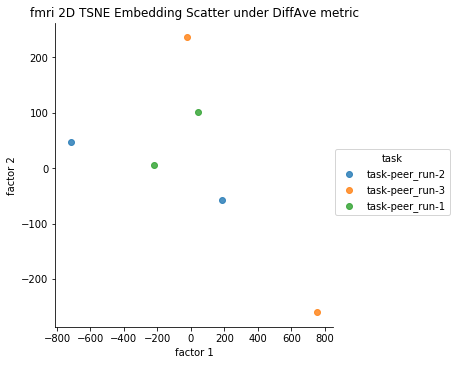

In [11]:
lpl.Embedding2DScatter(DM,
                       primary_label="subject",
                       mode="notebook").plot(TSNEEmbedder)
lpl.Embedding2DScatter(DM,
                       primary_label="task",
                       mode="notebook").plot(TSNEEmbedder)

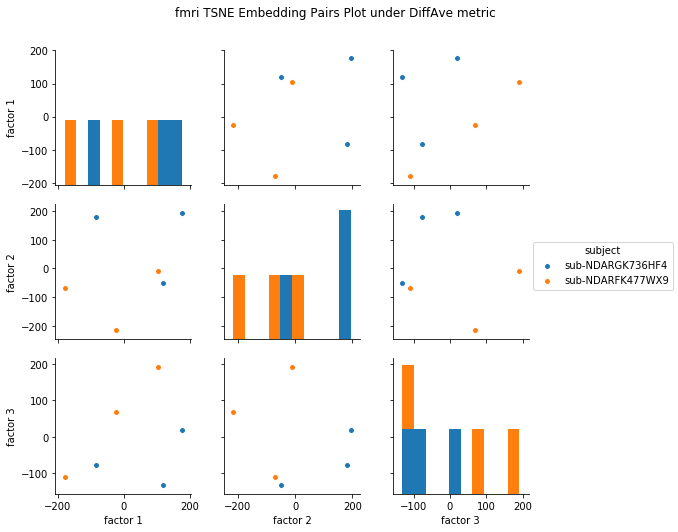

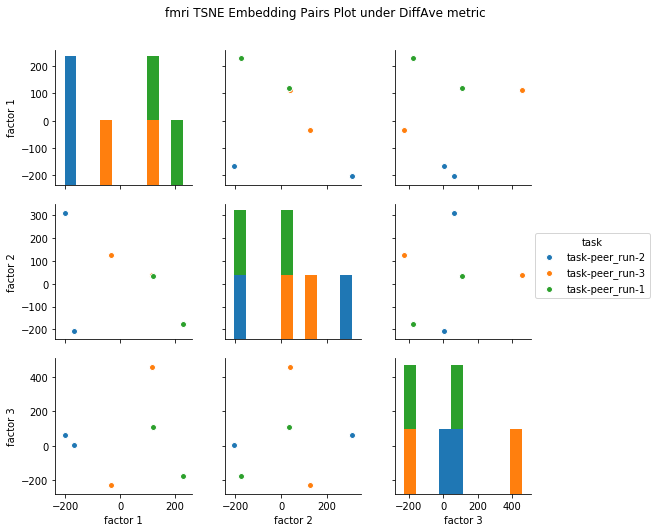

In [12]:
lpl.EmbeddingPairsPlotter(DM,
                          primary_label="subject",
                          mode="notebook").plot(TSNEEmbedder)
lpl.EmbeddingPairsPlotter(DM,
                          primary_label="task",
                          mode="notebook").plot(TSNEEmbedder)

In [13]:
PCAEmbedder = leb.PCAEmbedder(num_components=3)

In [14]:
lpl.EmbeddingParallelCoordinatePlotter(DM,
                                       primary_label="subject",
                                       mode="notebook").plot(PCAEmbedder)
lpl.EmbeddingParallelCoordinatePlotter(DM,
                                       primary_label="task",
                                       mode="notebook").plot(PCAEmbedder)

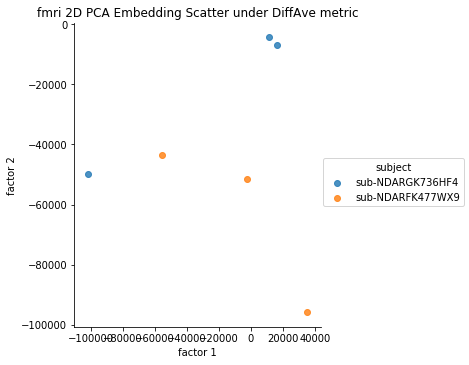

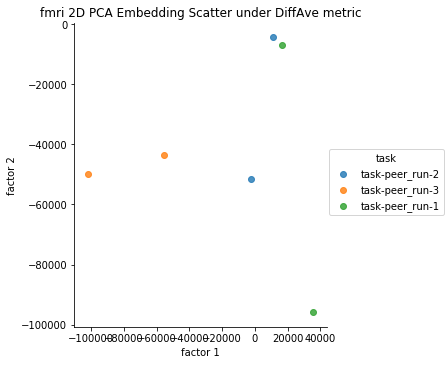

In [15]:
lpl.Embedding2DScatter(DM,
                       primary_label="subject",
                       mode="notebook").plot(PCAEmbedder)
lpl.Embedding2DScatter(DM,
                       primary_label="task",
                       mode="notebook").plot(PCAEmbedder)

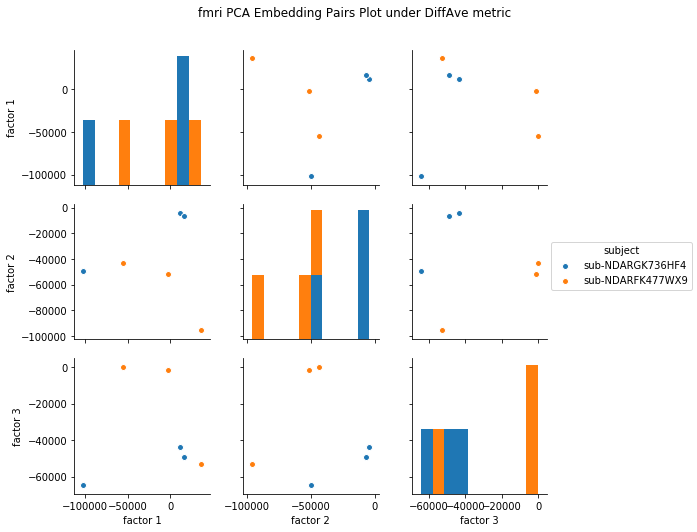

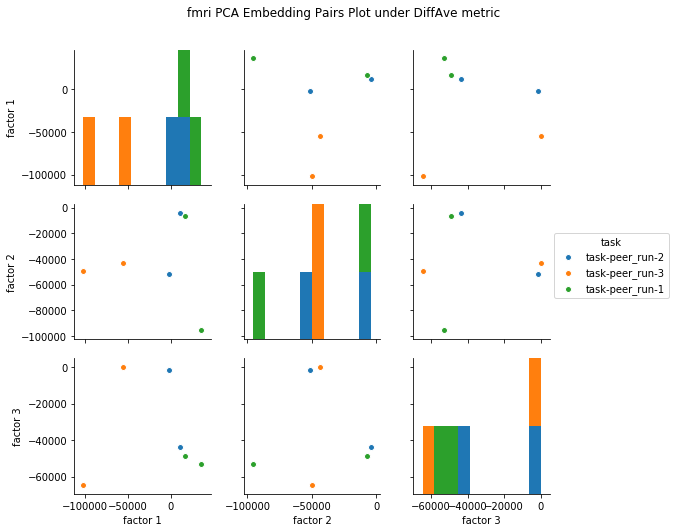

In [16]:
lpl.EmbeddingPairsPlotter(DM,
                          primary_label="subject",
                          mode="notebook").plot(PCAEmbedder)
lpl.EmbeddingPairsPlotter(DM,
                          primary_label="task",
                          mode="notebook").plot(PCAEmbedder)